In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sn
%matplotlib inline

In [21]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [22]:
pwd

'/home/growlt199/Downloads/flight_price_prediction/model_training/model_training_difmodels'

In [23]:
df = pd.read_csv("/home/growlt199/Downloads/manufacturing_project/data/flight_processed_data.csv",index_col=0)

In [24]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [25]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [26]:
#done label encoding in flight column
label_encoder = LabelEncoder()
df['flight'] = label_encoder.fit_transform(df['flight'])

as fetures i wanted to take 
* **stops,class,days_left,duration** are numerical colums
* and do one hot encoding in other feature columns are **desparture_time,arrival_time, airline and traval_route (combination of source city and destination city)**

In [27]:
#removing colums which i dont want to use in model 
#df1 =df.drop([ 'source_city','destination_city'],axis=1)

In [28]:
df1 =df.copy()

In [29]:
# get dummy variables for multiple columns
dummy_cols = ['airline', 'departure_time','arrival_time','source_city','destination_city']
df1_dummy = pd.get_dummies(df1[dummy_cols])

# concatenate original DataFrame with dummy variable DataFrame
df1_concat = pd.concat([df1.drop(dummy_cols, axis=1), df1_dummy], axis=1)

# display result
df1_concat.head()

,flight,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,1408,0,0,2.17,1,5953,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1387,0,0,2.33,1,5953,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1213,0,0,2.17,1,5956,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1559,0,0,2.25,1,5955,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1549,0,0,2.33,1,5955,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [30]:
#create x and y where x are features for the model and y as target
x = df1_concat.drop('price',axis=1)
y = df1_concat['price']

# **Random forest regression**

In [31]:
#use sklearn train test spilt for spilt our data in parts like training data and testing data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =101, shuffle=True)

#print shape of x train,y train, x test and y test 
print('x_train shape:-',x_train.shape)
print('x_test shape:-',x_test.shape)
print('y_train shape:-',y_train.shape)
print('y_test shape:-',y_test.shape)


#import model from sklearn
from sklearn.ensemble import RandomForestRegressor
print('model name :- random forest regression')

regr = RandomForestRegressor(random_state=123)

#training model input as x_train and y_tarin
regr.fit(x_train,y_train)

print('score on the testing data :-',regr.score(x_test,y_test))
print('score on the training data :-',regr.score(x_train,y_train))

#finding error methods 
from sklearn import metrics

#model is creted show give x test data as input and retuen predictd data 
predictions = regr.predict(x_test)

#MAE
print('MAE:-',metrics.mean_absolute_error(y_test,predictions))

#MSE
print('MSE:-',metrics.mean_squared_error(y_test,predictions))

#RMSE
print('RMSE:-',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

#r2
print("r2",r2_score(y_test, predictions))

x_train shape:- (209180, 35)
x_test shape:- (89649, 35)
y_train shape:- (209180,)
y_test shape:- (89649,)
model name :- random forest regression
score on the testing data :- 0.9905852383648599
score on the training data :- 0.9986261696844574
MAE:- 844.5448704237893
MSE:- 4757947.09933991
RMSE:- 2181.2718994522234
r2 0.9905852383648599


In [32]:
i = 0
for true_value, pred_value in zip(y_test, predictions):
    print(f"Actual: {true_value}, Predicted: {pred_value}")
    i+=1
    if i == 100:
        break

Actual: 50297, Predicted: 57416.18
Actual: 4724, Predicted: 5017.67
Actual: 56590, Predicted: 56590.0
Actual: 7424, Predicted: 8190.14
Actual: 3572, Predicted: 3572.0
Actual: 4501, Predicted: 4501.0
Actual: 11163, Predicted: 11200.83
Actual: 54896, Predicted: 54896.0
Actual: 55983, Predicted: 55983.0
Actual: 5068, Predicted: 4970.02
Actual: 65872, Predicted: 58148.48
Actual: 53152, Predicted: 53152.0
Actual: 3568, Predicted: 3568.0
Actual: 50810, Predicted: 50329.56
Actual: 6296, Predicted: 6296.0
Actual: 4896, Predicted: 4896.0
Actual: 50271, Predicted: 54391.38
Actual: 36577, Predicted: 36745.22
Actual: 3282, Predicted: 3282.0
Actual: 6578, Predicted: 7585.41
Actual: 16035, Predicted: 15662.2
Actual: 5955, Predicted: 5969.7
Actual: 58032, Predicted: 54572.18
Actual: 5771, Predicted: 5972.91
Actual: 2477, Predicted: 3001.73
Actual: 49725, Predicted: 49725.0
Actual: 4099, Predicted: 4220.79
Actual: 4721, Predicted: 4713.35
Actual: 4855, Predicted: 2823.65
Actual: 3014, Predicted: 3040.

In [33]:
regr.feature_importances_

array([2.65714204e-02, 2.02045330e-03, 8.84339222e-01, 4.61735881e-02,
       1.66083012e-02, 4.32185905e-04, 8.24252083e-04, 4.67178820e-05,
       2.78850624e-05, 2.20640598e-05, 4.07632303e-04, 7.90525008e-04,
       4.18272213e-04, 6.67587375e-04, 7.74413313e-06, 7.41681679e-04,
       5.34947527e-04, 6.03922093e-04, 1.30281852e-04, 8.23377681e-04,
       1.33760129e-04, 3.37350933e-04, 7.80359206e-04, 1.03319089e-03,
       5.59476522e-04, 1.80123141e-03, 8.11920304e-04, 5.05976992e-04,
       1.03315059e-03, 1.89617328e-03, 1.13920830e-03, 2.24277235e-03,
       2.70966791e-03, 1.79127532e-03, 1.03242346e-03])

In [34]:
x_train.columns

Index(['flight', 'stops', 'class', 'duration', 'days_left', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'source_city_Bangalore', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


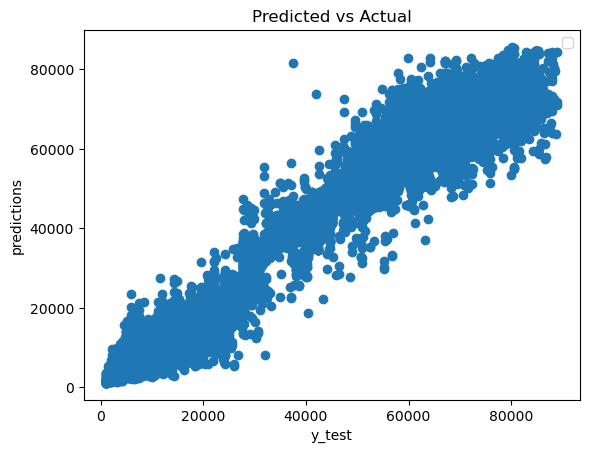

In [35]:
# Plotting the predicted values and actual values
plt.scatter(y_test,predictions)


# Customizing the plot
plt.title("Predicted vs Actual")
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.legend()

# Displaying the plot
plt.show()

# feature importances

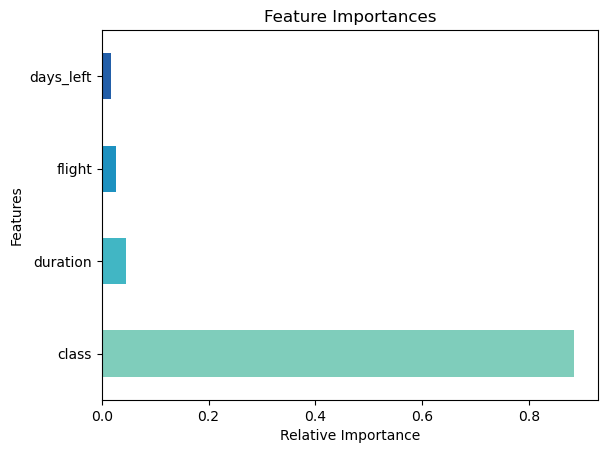

In [36]:
import matplotlib.pyplot as plt


# plot feature importances
feat_importances = pd.Series(regr.feature_importances_, index=x_train.columns)
feat_importances.nlargest(4).plot(kind='barh', color=['#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494','#081d58','#fc8d59','#ef6548','#d73027','#990000'])

# customize plot
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'travel_route'],
      dtype='object')

In [ ]:
#removing colums which are not more impact in previous model 
df_f_drop =df.drop(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city','travel_route'],axis=1)

In [ ]:
df_f_drop

,class,duration,days_left,price
0,0,2.17,1,5953
1,0,2.33,1,5953
2,0,2.17,1,5956
3,0,2.25,1,5955
4,0,2.33,1,5955
...,...,...,...,...
300139,1,10.08,49,69265
300140,1,10.42,49,77105
300141,1,13.83,49,79099
300142,1,10.00,49,81585


In [ ]:
#create x and y where x are features for the model and y as target
x_f_drop = df_f_drop.drop('price',axis=1)
y_f_drop = df_f_drop['price']

In [ ]:
#use sklearn train test spilt for spilt our data in parts like training data and testing data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_f_drop,y_f_drop,test_size=0.3, random_state =101, shuffle=True)

#print shape of x train,y train, x test and y test 
print('x_train shape:-',x_train.shape)
print('x_test shape:-',x_test.shape)
print('y_train shape:-',y_train.shape)
print('y_test shape:-',y_test.shape)


#import model from sklearn
from sklearn.ensemble import RandomForestRegressor
print('model name :- random forest regression')

regr = RandomForestRegressor(random_state=123)

#training model input as x_train and y_tarin
regr.fit(x_train,y_train)

print('score on the testing data :-',regr.score(x_test,y_test))
print('score on the training data :-',regr.score(x_train,y_train))

#finding error methods 
from sklearn import metrics

#model is creted show give x test data as input and retuen predictd data 
predictions = regr.predict(x_test)

#MAE
print('MAE:-',metrics.mean_absolute_error(y_test,predictions))

#MSE
print('MSE:-',metrics.mean_squared_error(y_test,predictions))

#RMSE
print('RMSE:-',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

#r2
print("r2",r2_score(y_test, predictions))


x_train shape:- (210100, 3)
x_test shape:- (90044, 3)
y_train shape:- (210100,)
y_test shape:- (90044,)
model name :- random forest regression
score on the testing data :- 0.9214925738253971
score on the training data :- 0.946955226156108
MAE:- 3757.4095884538788
MSE:- 40407338.48294312
RMSE:- 6356.676685418499
r2 0.9214925738253971
